In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Problem 1: Classification of handwritten digits

The **MNIST** dataset, short for Modified National Institute of Standards and Technology dataset, is a widely used and extensively studied collection of handwritten digit images. 
The images in the dataset were originally created by high school students and employees of the US Census Bureau.

The dataset has been used for a variety of machine learning and computer vision tasks, including image classification, pattern recognition, and deep learning. It is often used as a benchmark to evaluate the performance of new models and algorithms, due to its relative simplicity and the availability of established baselines.

Despite its origins in the 1990s, the MNIST dataset remains a popular and valuable resource for researchers and practitioners in the field of machine learning. 
Its accessibility and familiarity have helped to make it a standard reference for comparing and evaluating new techniques in image analysis and pattern recognition.

In [3]:
# load the data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/digits.csv'
data = pd.read_csv(url)
data.head(5) # display first 5 rows of the dataset

,pixel 0,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,...,pixel 775,pixel 776,pixel 777,pixel 778,pixel 779,pixel 780,pixel 781,pixel 782,pixel 783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [4]:
X = data.iloc[:,0:784].to_numpy() # pixels
y = data['label'].to_numpy() # labels

The dataset under consideration comprises 5,000 images, with each image comprising 28x28 pixels, resulting in a total of 784 (28×28=784) features per image.
Each feature denotes the intensity of a single pixel and can range from 0 (representing white) to 1 (representing black).
In other words, this dataset is a two-dimensional array of grayscale images where each pixel's value represents the brightness of the corresponding location in the image.

In [5]:
X.shape

(5000, 784)

To visualize a single digit from the dataset, we can extract a row of $X$ and reshape it into a 28x28 array. 
We can then display this image using the `imshow()` function in Python's matplotlib library.

(-0.5, 27.5, 27.5, -0.5)

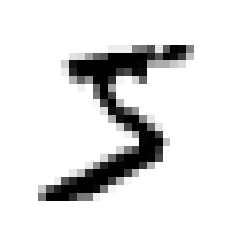

In [5]:
some_digit = X[0] # grab a row
some_digit_image = some_digit.reshape(28,28) # reshape it as a 28x28 array
plt.imshow(some_digit_image,cmap = 'binary') # plot the image
plt.axis('off')

From the visual appearance of the digit, it appears to be the numeral 5. To confirm this, we can check the label associated with this digit in the dataset.

In [6]:
y[0]

5

The figure below displays additional images from the dataset.

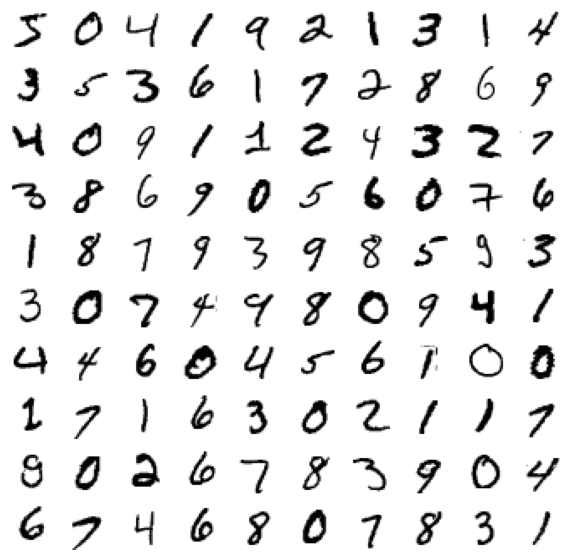

In [7]:
plt.figure(figsize=(10,10))
for i in range(100):
    digit = X[i]
    digit_image = digit.reshape(28,28)
    plt.subplot(10,10,i+1)
    plt.imshow(digit_image,cmap = 'binary')
    plt.axis('off')

The objective of this problem is to train a linear regression model to identify a specific digit, such as the number 0. 
The resulting model, also known as a "0-detector," will classify input images into one of two classes: 0 or not-0.

We will generate a binary vector, denoted as y_0, consisting of only 0's and 1's.
Specifically, the i-th entry of this vector will be 1 if the i-th digit in the dataset is a zero, and 0 otherwise, i.e., 

$$
y_0[i]=
\left\{ \begin{array}{ll} 1 & \mbox{ if digit $i$ is a zero}\\
0 & \mbox{ if digit $i$ is not a zero}. \end{array}\right.
$$

In [8]:
y_0 = np.zeros(len(y))
y_0[y==0]=1 # 1 for all 0s, 0 for all other digits

## Part 1

Use the **Gradient Descent** algorithm to fit a linear regression model that predicts the binary vector y_0 using the pixel intensities in the matrix X.

## Part 2

Now that you have fitted your linear regression model, you can use it to classify all of the digits in the following test set.

In [9]:
# load the test data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/digits_test.csv'
data_test = pd.read_csv(url)
data_test.head(5) # display first 5 rows of the dataset

,pixel 0,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,...,pixel 775,pixel 776,pixel 777,pixel 778,pixel 779,pixel 780,pixel 781,pixel 782,pixel 783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [10]:
X_test = data_test.iloc[:,0:784].to_numpy() # pixels
y_test = data_test['label'].to_numpy() # labels

In [11]:
y_0_test = np.zeros(len(y_test))
y_0_test[y_test==0]=1 # 1 for all 0s, 0 for all other digits

use the following **classification rule** to determine whether each digit in the test set is a 0 or not:

$$
\mbox{classify digit $i$ as a }\left\{ \begin{array}{ll} 
0 & \mbox{ if predicted y_0_test}[i]>0.5 \\
\mbox{non-}0 & \mbox{ if predicted y_0_test}[i]\leq 0.5
\end{array}\right.
$$

## Part 3

Calculate the percentage of correctly classified digits and the percentage of incorrectly classified digits.